In [1]:
import torch
import os
from pathlib import Path
from networks.mrnet import MRFactory
from datasets.sampler import make2Dcoords
import yaml
from yaml.loader import SafeLoader
import matplotlib.pyplot as plt

In [2]:
os.environ["WANDB_NOTEBOOK_NAME"] = "eval-net.ipynb"
BASE_DIR = Path('.').absolute().parents[0]
IMAGE_PATH = BASE_DIR.joinpath('img')
MODEL_PATH = BASE_DIR.joinpath('models')

In [3]:
project_name = "test_eval"
with open('../configs/config_base_m_net.yml') as f:
    hyper = yaml.load(f, Loader=SafeLoader)


In [4]:
mrmodel = MRFactory.load_state_dict(
    os.path.join(MODEL_PATH,'MGalbe.pth'))

In [5]:
print("Model: ", type(mrmodel))

Model:  <class 'networks.mrnet.MNet'>


In [6]:
for p in mrmodel.parameters():
    print("p: ", p.shape, " = ", p.numel())
total_params = sum(p.numel() for p in mrmodel.parameters()) - mrmodel.n_stages()
print("TOTAL = ", total_params)
print("MODEL TOTAL = ", mrmodel.total_parameters())

p:  torch.Size([64, 2])  =  128
p:  torch.Size([64, 64])  =  4096
p:  torch.Size([64])  =  64
p:  torch.Size([1, 64])  =  64
p:  torch.Size([1])  =  1
p:  torch.Size([64, 2])  =  128
p:  torch.Size([64, 128])  =  8192
p:  torch.Size([64])  =  64
p:  torch.Size([1, 64])  =  64
p:  torch.Size([1])  =  1
p:  torch.Size([96, 2])  =  192
p:  torch.Size([96, 160])  =  15360
p:  torch.Size([96])  =  96
p:  torch.Size([1, 96])  =  96
p:  torch.Size([1])  =  1
p:  torch.Size([96, 2])  =  192
p:  torch.Size([96, 192])  =  18432
p:  torch.Size([96])  =  96
p:  torch.Size([1, 96])  =  96
p:  torch.Size([1])  =  1
TOTAL =  47360
MODEL TOTAL =  47360


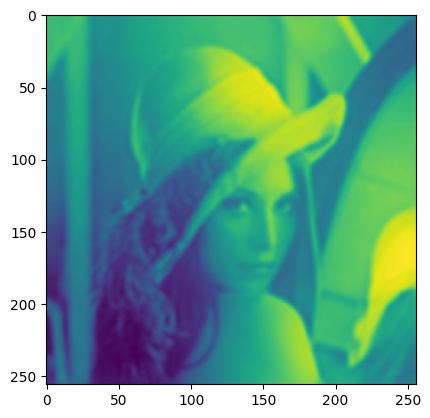

In [7]:
output = mrmodel(make2Dcoords(256,256))
model_out = torch.clamp(output['model_out'], 0.0, 1.0)

plt.imshow(model_out.cpu().view(256,256).detach().numpy())
